# Univariate feature selection

This notebook focuses on univariate feature selection methods implemented in sklearn.feature_selection module: `chi2`, `f_classif`, `mutual_info_classif`. For each one the procedure is similar: the dependency between the variables and target is tested using the statistical method and the best `k` (procedure parameter) variables are kept in order to calibrate ML models.

In the final parts, the feature selection is carried on with the usage of Variance Inflation Factor to remove multicollinearly dependent features and, moreover, hyperparameters tuning with crossvalidation grid search is proceeded.

Whole procedure is repeated twice - once for the digits dataset and once for the artificial one.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import eval_models
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoLarsIC, LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import log_loss, balanced_accuracy_score
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
warnings.filterwarnings('ignore')

In [3]:
X_art,y_art,X_dig,y_dig= eval_models.get_data()
X_dig_train,X_dig_test,y_dig_train,y_dig_test=train_test_split(X_dig,y_dig,stratify=y_dig,test_size=0.25)

# Digits dataset

In [4]:
X_dig_train,X_dig_test,y_dig_train,y_dig_test = eval_models.get_train_test('digits')

In [5]:
X_dig_train, X_dig_test = eval_models.drop_constants(X_dig_train, X_dig_test)

In [6]:
def drop_contants(df, df2):
    to_drop = df.columns[df.var()==0]
    return df.drop(to_drop, axis=1), df2.drop(to_drop, axis=1) 

Univariate feature selections of the best 250 features for digits dataset:

In [7]:
r = eval_models.test_univariates(X_dig_train, y_dig_train, X_dig_test, y_dig_test, k=250)

[17:07:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method chi2, 250 variables
               Classifier  BA score  Data normalization method    k  \
0      LogisticRegression  0.950667               False   chi2  250   
1  RandomForestClassifier  0.970667               False   chi2  250   
2      AdaBoostClassifier  0.950000               False   chi2  250   
3          LGBMClassifier  0.976000               False   chi2  250   
4           XGBClassifier  0.976000               False   chi2  250   

                                           variables  
0  [12, 34, 137, 186, 201, 210, 291, 296, 324, 33...  
1  [12, 34, 137, 186, 201, 210, 291, 296, 324, 33...  
2  [12, 34, 137, 186, 201, 210, 291, 296, 324, 33...  
3  [12, 34, 137, 186, 201, 210, 291, 296, 324, 33...  
4  [1

In [8]:
r

,Classifier,BA score,Data normalization,method,k,variables
0,LogisticRegression,0.950667,False,chi2,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
1,RandomForestClassifier,0.970667,False,chi2,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
2,AdaBoostClassifier,0.950000,False,chi2,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
3,LGBMClassifier,0.976000,False,chi2,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
4,XGBClassifier,0.976000,False,chi2,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
5,LogisticRegression,0.953333,False,f_classif,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
6,RandomForestClassifier,0.968000,False,f_classif,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
7,AdaBoostClassifier,0.952000,False,f_classif,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
8,LGBMClassifier,0.974000,False,f_classif,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."
9,XGBClassifier,0.974000,False,f_classif,250,"[12, 34, 137, 186, 201, 210, 291, 296, 324, 33..."


In [9]:
for k in [50, 100, 150, 200, 300, 350]:
    new_r = eval_models.test_univariates(X_dig_train, y_dig_train, X_dig_test, y_dig_test, k=k)
    r = pd.concat((r, new_r), ignore_index = True)

[18:42:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method chi2, 50 variables
               Classifier  BA score  Data normalization method   k  \
0      LogisticRegression  0.920000               False   chi2  50   
1  RandomForestClassifier  0.932000               False   chi2  50   
2      AdaBoostClassifier  0.912000               False   chi2  50   
3          LGBMClassifier  0.941333               False   chi2  50   
4           XGBClassifier  0.938667               False   chi2  50   

                                           variables  
0  [210, 334, 450, 504, 549, 560, 568, 571, 707, ...  
1  [210, 334, 450, 504, 549, 560, 568, 571, 707, ...  
2  [210, 334, 450, 504, 549, 560, 568, 571, 707, ...  
3  [210, 334, 450, 504, 549, 560, 568, 571, 707, ...  
4  [210, 334

[11:24:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method mutual_info_classif, 100 variables
               Classifier  BA score  Data normalization               method  \
0      LogisticRegression  0.935333               False  mutual_info_classif   
1  RandomForestClassifier  0.958000               False  mutual_info_classif   
2      AdaBoostClassifier  0.938000               False  mutual_info_classif   
3          LGBMClassifier  0.960000               False  mutual_info_classif   
4           XGBClassifier  0.966667               False  mutual_info_classif   

     k                                          variables  
0  100  [34, 137, 210, 291, 334, 450, 504, 525, 546, 5...  
1  100  [34, 137, 210, 291, 334, 450, 504, 525, 546, 5...  
2  100  [34, 137, 210, 291, 334

[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled True, method f_classif, 150 variables
               Classifier  BA score  Data normalization     method    k  \
0      LogisticRegression  0.949333                True  f_classif  150   
1  RandomForestClassifier  0.962667                True  f_classif  150   
2      AdaBoostClassifier  0.940000                True  f_classif  150   
3          LGBMClassifier  0.968000                True  f_classif  150   
4           XGBClassifier  0.972000                True  f_classif  150   

                                           variables  
0  [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...  
1  [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...  
2  [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...  
3  [34, 137, 186, 201, 210, 291,

[16:47:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method chi2, 300 variables
               Classifier  BA score  Data normalization method    k  \
0      LogisticRegression  0.938667               False   chi2  300   
1  RandomForestClassifier  0.970000               False   chi2  300   
2      AdaBoostClassifier  0.955333               False   chi2  300   
3          LGBMClassifier  0.974000               False   chi2  300   
4           XGBClassifier  0.976000               False   chi2  300   

                                           variables  
0  [12, 34, 83, 137, 186, 201, 210, 242, 291, 296...  
1  [12, 34, 83, 137, 186, 201, 210, 242, 291, 296...  
2  [12, 34, 83, 137, 186, 201, 210, 242, 291, 296...  
3  [12, 34, 83, 137, 186, 201, 210, 242, 291, 296...  
4  [1

[18:12:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method mutual_info_classif, 350 variables
               Classifier  BA score  Data normalization               method  \
0      LogisticRegression  0.952000               False  mutual_info_classif   
1  RandomForestClassifier  0.970667               False  mutual_info_classif   
2      AdaBoostClassifier  0.960667               False  mutual_info_classif   
3          LGBMClassifier  0.980000               False  mutual_info_classif   
4           XGBClassifier  0.980000               False  mutual_info_classif   

     k                                          variables  
0  350  [12, 34, 53, 66, 70, 83, 101, 129, 137, 186, 1...  
1  350  [12, 34, 53, 66, 70, 83, 101, 129, 137, 186, 1...  
2  350  [12, 34, 53, 66, 70, 83

In [10]:
r['score'] = r['BA score'] - 0.01 * np.maximum(0.005*r['k']-0.25, 0)

The best performances on the test dataset, including penalties for complex (in sense of number of variables) models

In [11]:
new_r

,Classifier,BA score,Data normalization,method,k,variables
0,LogisticRegression,0.943333,False,chi2,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
1,RandomForestClassifier,0.972000,False,chi2,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
2,AdaBoostClassifier,0.966667,False,chi2,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
3,LGBMClassifier,0.976667,False,chi2,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
4,XGBClassifier,0.977333,False,chi2,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
5,LogisticRegression,0.943333,False,f_classif,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
6,RandomForestClassifier,0.970667,False,f_classif,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
7,AdaBoostClassifier,0.963333,False,f_classif,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
8,LGBMClassifier,0.979333,False,f_classif,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."
9,XGBClassifier,0.978667,False,f_classif,350,"[2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ..."


In [12]:
agg_r = r.sort_values(['k', 'method', 'score'], ascending=False).groupby(['k', 'method']).first().sort_values('score')
agg_r

Classifier  BA score  Data normalization  \
k   method                                                              
50  f_classif             XGBClassifier  0.937333               False   
    chi2                 LGBMClassifier  0.941333               False   
    mutual_info_classif   XGBClassifier  0.947333               False   
100 chi2                  XGBClassifier  0.962000               False   
    f_classif             XGBClassifier  0.963333               False   
350 chi2                  XGBClassifier  0.977333               False   
300 f_classif            LGBMClassifier  0.975333               False   
    chi2                  XGBClassifier  0.976000               False   
250 f_classif            LGBMClassifier  0.974000               False   
100 mutual_info_classif   XGBClassifier  0.966667               False   
350 f_classif            LGBMClassifier  0.979333               False   
300 mutual_info_classif   XGBClassifier  0.977333               False   
350 mutual_info_classif  LGBMClassifier  0.980000               False   
250 chi2                 LGBMClassifier  0.976000               False   
150 mutual_info_classif   XGBClassifier  0.971333               False   
    f_classif             XGBClassifier  0.972000               False   
    chi2                  XGBClassifier  0.972000               False   
250 mutual_info_classif   XGBClassifier  0.978000               False   
200 mutual_info_classif   XGBClassifier  0.976000                True   
    chi2                  XGBClassifier  0.976667               False   
    f_classif             XGBClassifier  0.976667               False   

                                                                 variables  \
k   method                                                                   
50  f_classif            [210, 334, 450, 504, 549, 560, 568, 571, 707, ...   
    chi2                 [210, 334, 450, 504, 549, 560, 568, 571, 707, ...   
    mutual_info_classif  [210, 334, 504, 549, 560, 568, 571, 707, 890, ...   
100 chi2                 [34, 137, 210, 291, 334, 450, 504, 525, 546, 5...   
    f_classif            [34, 137, 210, 291, 334, 450, 504, 525, 546, 5...   
350 chi2                 [2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ...   
300 f_classif            [12, 34, 83, 137, 186, 201, 210, 291, 296, 324...   
    chi2                 [12, 34, 83, 137, 186, 201, 210, 242, 291, 296...   
250 f_classif            [12, 34, 137, 186, 201, 210, 291, 296, 324, 33...   
100 mutual_info_classif  [34, 137, 210, 291, 334, 450, 504, 525, 546, 5...   
350 f_classif            [2, 12, 34, 83, 137, 153, 186, 192, 201, 210, ...   
300 mutual_info_classif  [12, 34, 101, 137, 162, 186, 201, 210, 291, 29...   
350 mutual_info_classif  [12, 34, 53, 66, 70, 83, 101, 129, 137, 186, 1...   
250 chi2                 [12, 34, 137, 186, 201, 210, 291, 296, 324, 33...   
150 mutual_info_classif  [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...   
    f_classif            [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...   
    chi2                 [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...   
250 mutual_info_classif  [12, 34, 83, 137, 186, 201, 210, 291, 296, 324...   
200 mutual_info_classif  [12, 34, 83, 137, 186, 201, 210, 291, 296, 334...   
    chi2                 [34, 137, 186, 201, 210, 291, 296, 334, 360, 4...   
    f_classif            [12, 34, 137, 186, 201, 210, 291, 296, 334, 36...   

                            score  
k   method                         
50  f_classif            0.937333  
    chi2                 0.941333  
    mutual_info_classif  0.947333  
100 chi2                 0.959500  
    f_classif            0.960833  
350 chi2                 0.962333  
300 f_classif            0.962833  
    chi2                 0.963500  
250 f_classif            0.964000  
100 mutual_info_classif  0.964167  
350 f_classif            0.964333  
300 mutual_info_classif  0.964833  
350 mutual_info_classif  0.965000  
250 chi2      

Best 200 variables (set that returned the best score):

In [14]:
vars200 = json.loads(agg_r['variables'].iloc[-1])

## Variance inflation factors

Another step of feature selection - variation inflation factor will be carried out on 100 pre-selected variables (for larger sets it is impossible to carry out due to computational complexity). Variables with $VIF>10$ will be removed from the dataset.

In [15]:
mm = MinMaxScaler()
X_dig_train_mm = pd.DataFrame(mm.fit_transform(X_dig_train), columns=X_dig_train.columns)
X_dig_train_mm = X_dig_train_mm.iloc[:, vars200]
X_dig_test_mm = pd.DataFrame(mm.transform(X_dig_test), columns=X_dig_test.columns)
X_dig_train_200_vif = eval_models.delete_multicollinear(X_dig_train_mm)

199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
123 features left


In [16]:
results_200_vif = eval_models.get_models_ba(X_dig_train_200_vif,
                                              X_dig_test_mm,
                                              y_dig_train,
                                              y_dig_test,
                                              verbose=False)

[21:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
results_200_vif['score'] = results_200_vif['BA score'] - 0.01*max((0.005*len(X_dig_train_200_vif.columns)-0.25), 0)

In [19]:
results_200_vif

,Classifier,BA score,score
0,LogisticRegression,0.944000,0.940350
1,RandomForestClassifier,0.969333,0.965683
2,AdaBoostClassifier,0.942000,0.938350
3,LGBMClassifier,0.971333,0.967683
4,XGBClassifier,0.974000,0.970350


Unfortunately, the results after VIF procedure are worse than the initial ones even though the number of predictors was reduced.

# Artificial dataset

Similar procedure will be repeated for the second dataset.

In [20]:
X_art_train,X_art_test,y_art_train,y_art_test = eval_models.get_train_test('artificial')

In [21]:
X_art_train, X_art_test = eval_models.drop_constants(X_art_train, X_art_test)

In [22]:
r_art = eval_models.test_univariates(X_art_train, y_art_train, X_art_test, y_art_test, k=5)

[01:31:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method chi2, 5 variables
               Classifier  BA score  Data normalization method  k  \
0      LogisticRegression     0.600               False   chi2  5   
1  RandomForestClassifier     0.820               False   chi2  5   
2      AdaBoostClassifier     0.628               False   chi2  5   
3          LGBMClassifier     0.788               False   chi2  5   
4           XGBClassifier     0.804               False   chi2  5   

                   variables  
0  [105, 336, 442, 475, 493]  
1  [105, 336, 442, 475, 493]  
2  [105, 336, 442, 475, 493]  
3  [105, 336, 442, 475, 493]  
4  [105, 336, 442, 475, 493]  
[01:31:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used wi

In [23]:
for k in [10, 15, 20, 25]:
    new_r_art = eval_models.test_univariates(X_art_train, y_art_train, X_art_test, y_art_test, k=k)
    r_art = pd.concat((r_art, new_r_art), ignore_index = True)

[01:32:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method chi2, 10 variables
               Classifier  BA score  Data normalization method   k  \
0      LogisticRegression     0.624               False   chi2  10   
1  RandomForestClassifier     0.888               False   chi2  10   
2      AdaBoostClassifier     0.632               False   chi2  10   
3          LGBMClassifier     0.874               False   chi2  10   
4           XGBClassifier     0.880               False   chi2  10   

                                           variables  
0  [64, 105, 241, 336, 338, 378, 442, 453, 475, 493]  
1  [64, 105, 241, 336, 338, 378, 442, 453, 475, 493]  
2  [64, 105, 241, 336, 338, 378, 442, 453, 475, 493]  
3  [64, 105, 241, 336, 338, 378, 442, 453, 475, 493]  
4  [64, 105,

[01:32:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled False, method mutual_info_classif, 15 variables
               Classifier  BA score  Data normalization               method  \
0      LogisticRegression     0.612               False  mutual_info_classif   
1  RandomForestClassifier     0.676               False  mutual_info_classif   
2      AdaBoostClassifier     0.604               False  mutual_info_classif   
3          LGBMClassifier     0.694               False  mutual_info_classif   
4           XGBClassifier     0.668               False  mutual_info_classif   

    k                                          variables  
0  15  [20, 105, 128, 133, 180, 193, 223, 241, 302, 3...  
1  15  [20, 105, 128, 133, 180, 193, 223, 241, 302, 3...  
2  15  [20, 105, 128, 133, 180, 193

[01:32:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scaled True, method f_classif, 20 variables
               Classifier  BA score  Data normalization     method   k  \
0      LogisticRegression     0.598                True  f_classif  20   
1  RandomForestClassifier     0.842                True  f_classif  20   
2      AdaBoostClassifier     0.616                True  f_classif  20   
3          LGBMClassifier     0.858                True  f_classif  20   
4           XGBClassifier     0.832                True  f_classif  20   

                                           variables  
0  [43, 48, 64, 105, 128, 152, 241, 282, 296, 323...  
1  [43, 48, 64, 105, 128, 152, 241, 282, 296, 323...  
2  [43, 48, 64, 105, 128, 152, 241, 282, 296, 323...  
3  [43, 48, 64, 105, 128, 152, 241, 282

In [24]:
r_art['score'] = r_art['BA score'] - 0.01 * np.maximum(0.2*r_art['k']-1, 0)

In [25]:
agg_r_art = r_art.sort_values(['k', 'method', 'score'], ascending=False).groupby(['k', 'method']).first().sort_values('score')
agg_r_art

,,Classifier,BA score,Data normalization,variables,score
k,method,,,,,
5,f_classif,LGBMClassifier,0.654,True,"[64, 241, 336, 442, 475]",0.654
15,mutual_info_classif,LGBMClassifier,0.694,False,"[20, 105, 128, 133, 180, 193, 223, 241, 302, 3...",0.674
25,mutual_info_classif,LGBMClassifier,0.736,False,"[72, 79, 105, 128, 163, 188, 190, 191, 201, 24...",0.696
5,mutual_info_classif,RandomForestClassifier,0.708,False,"[15, 105, 241, 472, 475]",0.708
20,mutual_info_classif,LGBMClassifier,0.750,False,"[19, 99, 105, 128, 151, 180, 241, 300, 322, 33...",0.720
10,mutual_info_classif,LGBMClassifier,0.776,True,"[88, 105, 152, 238, 241, 338, 451, 459, 472, 475]",0.766
25,f_classif,RandomForestClassifier,0.832,False,"[4, 43, 48, 55, 64, 105, 119, 128, 136, 152, 2...",0.792
20,chi2,RandomForestClassifier,0.842,False,"[4, 48, 56, 64, 105, 136, 175, 204, 241, 329, ...",0.812
10,f_classif,RandomForestClassifier,0.826,True,"[64, 128, 241, 336, 338, 442, 453, 472, 475, 493]",0.816


In [26]:
vars10_art = json.loads(agg_r_art.loc[(10, 'chi2'), 'variables'])

### Variance Inflation Factor

This time with increased threshold so that 5 variables should remain in the dataset.

In [27]:
X_art_train_10_vif = eval_models.delete_multicollinear(X_art_train.loc[:, X_art_train.columns[vars10_art]], vif_thresh=40)

9
8
7
6
5
5 features left


In [28]:
results_10_vif_art = eval_models.get_models_ba(X_art_train_10_vif,
                                              X_art_test[X_art_train_10_vif.columns],
                                              y_art_train,
                                              y_art_test,
                                              verbose=False)

[01:33:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
results_10_vif_art['score'] = results_10_vif_art['BA score'] - 0.01 * np.maximum(0.2*5-1, 0)
results_10_vif_art

,Classifier,BA score,score
0,LogisticRegression,0.606,0.606
1,RandomForestClassifier,0.822,0.822
2,AdaBoostClassifier,0.632,0.632
3,LGBMClassifier,0.786,0.786
4,XGBClassifier,0.784,0.784


Unfortunately, the results are not impressive and significantly worse than without VIF.

# Visualization

In [30]:
vis_digits = r.sort_values(['BA score'], ascending=False).groupby(['k', 'method']).first().reset_index()
vis_digits

,k,method,Classifier,BA score,Data normalization,variables,score
0,50,chi2,LGBMClassifier,0.941333,True,"[210, 334, 450, 504, 549, 560, 568, 571, 707, ...",0.941333
1,50,f_classif,XGBClassifier,0.937333,False,"[210, 334, 450, 504, 549, 560, 568, 571, 707, ...",0.937333
2,50,mutual_info_classif,XGBClassifier,0.947333,False,"[210, 334, 504, 549, 560, 568, 571, 707, 890, ...",0.947333
3,100,chi2,XGBClassifier,0.962000,False,"[34, 137, 210, 291, 334, 450, 504, 525, 546, 5...",0.959500
4,100,f_classif,XGBClassifier,0.963333,True,"[34, 137, 210, 291, 334, 450, 504, 525, 546, 5...",0.960833
5,100,mutual_info_classif,XGBClassifier,0.966667,False,"[34, 137, 210, 291, 334, 450, 504, 525, 546, 5...",0.964167
6,150,chi2,XGBClassifier,0.972000,False,"[34, 137, 186, 201, 210, 291, 296, 334, 360, 4...",0.967000
7,150,f_classif,XGBClassifier,0.972000,False,"[34, 137, 186, 201, 210, 291, 296, 334, 360, 4...",0.967000
8,150,mutual_info_classif,XGBClassifier,0.971333,False,"[34, 137, 186, 201, 210, 291, 296, 334, 360, 4...",0.966333
9,200,chi2,XGBClassifier,0.976667,False,"[34, 137, 186, 201, 210, 291, 296, 334, 360, 4...",0.969167


In [31]:
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 25

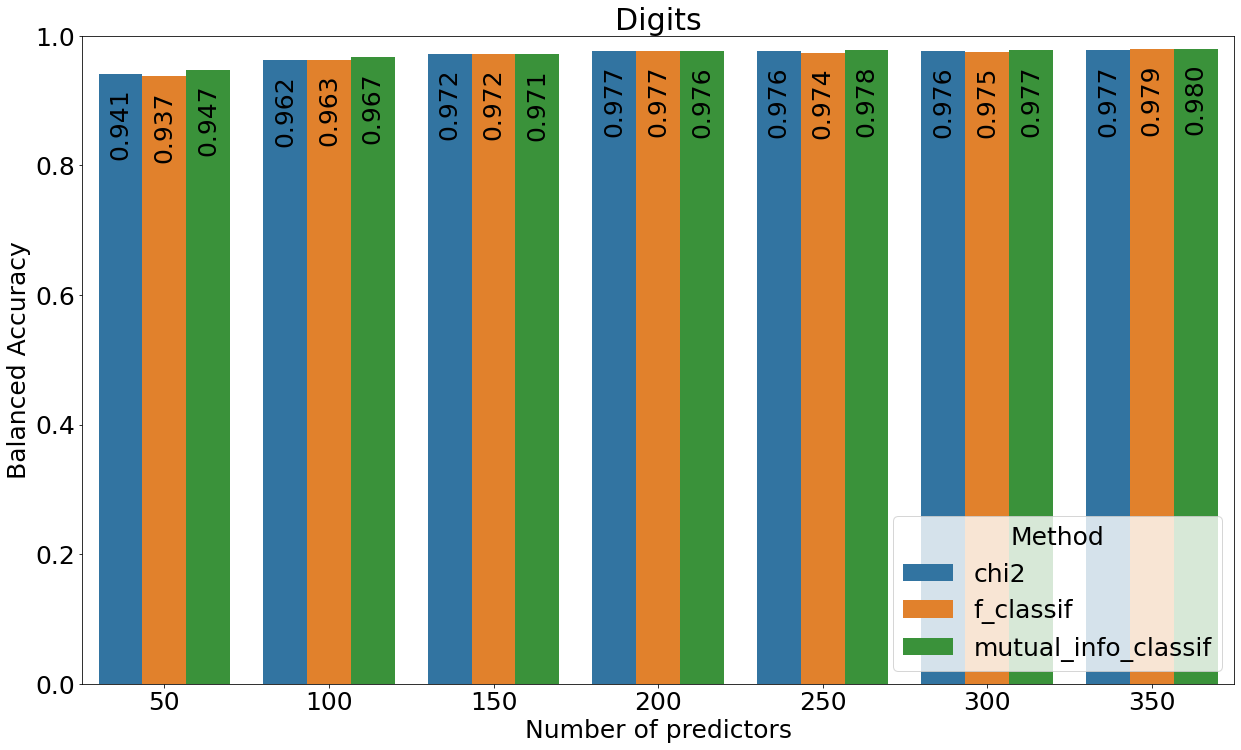

In [32]:
bars = sns.barplot(x='k', y='BA score', hue='method', data=vis_digits)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()-0.09), ha='center', va='center', xytext=(0, 8), rotation=90,
                   textcoords='offset points')
plt.legend(loc=4, title='Method')
plt.ylim(0, 1)
plt.xlabel('Number of predictors')
plt.ylabel('Balanced Accuracy')
plt.title('Digits')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("../images/ufs_digits_o.svg")
plt.show()

In [33]:
vis_art = r_art.sort_values(['BA score'], ascending=False).groupby(['k', 'method']).first().reset_index()
vis_art

,k,method,Classifier,BA score,Data normalization,variables,score
0,5,chi2,RandomForestClassifier,0.820,False,"[105, 336, 442, 475, 493]",0.820
1,5,f_classif,LGBMClassifier,0.654,True,"[64, 241, 336, 442, 475]",0.654
2,5,mutual_info_classif,RandomForestClassifier,0.708,False,"[15, 105, 241, 472, 475]",0.708
3,10,chi2,RandomForestClassifier,0.888,False,"[64, 105, 241, 336, 338, 378, 442, 453, 475, 493]",0.878
4,10,f_classif,RandomForestClassifier,0.826,True,"[64, 128, 241, 336, 338, 442, 453, 472, 475, 493]",0.816
5,10,mutual_info_classif,LGBMClassifier,0.776,True,"[88, 105, 152, 238, 241, 338, 451, 459, 472, 475]",0.766
6,15,chi2,RandomForestClassifier,0.880,True,"[48, 64, 105, 128, 241, 323, 336, 338, 378, 41...",0.860
7,15,f_classif,RandomForestClassifier,0.884,True,"[48, 64, 105, 128, 241, 282, 323, 336, 338, 37...",0.864
8,15,mutual_info_classif,LGBMClassifier,0.694,False,"[20, 105, 128, 133, 180, 193, 223, 241, 302, 3...",0.674
9,20,chi2,RandomForestClassifier,0.842,False,"[4, 48, 56, 64, 105, 136, 175, 204, 241, 329, ...",0.812


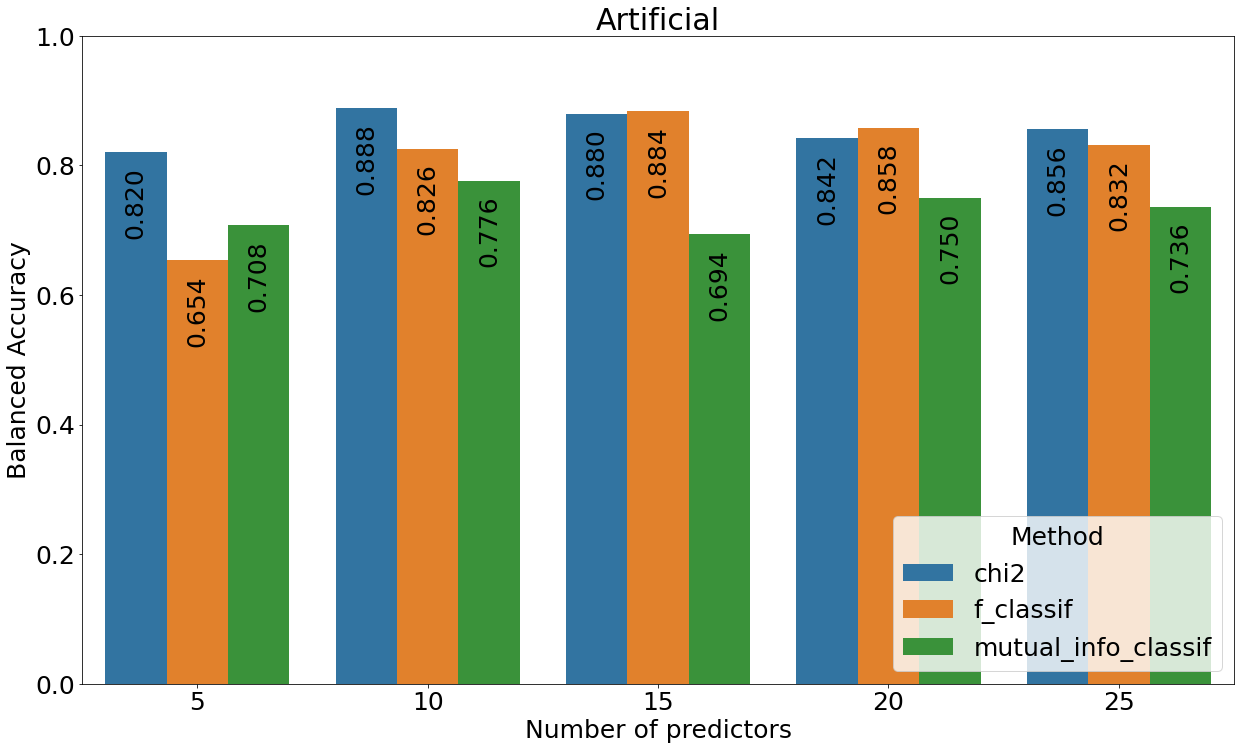

In [34]:
bars = sns.barplot(x='k', y='BA score', hue='method', data=vis_art)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()-0.09), ha='center', va='center', xytext=(0, 8), rotation=90,
                   textcoords='offset points')
plt.legend(loc=4, title='Method')
plt.ylim(0, 1)
plt.xlabel('Number of predictors')
plt.ylabel('Balanced Accuracy')
plt.title('Artificial')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("../images/ufs_artificial_o.svg")
plt.show()